In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We need to see what the data looks like.

In [2]:
# Load Data
df = pd.read_csv('Mall_Customers.csv')

In [3]:
# Drop CustomerID (It's just a number, not useful for prediction)
df = df.drop('CustomerID', axis=1)

In [4]:
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


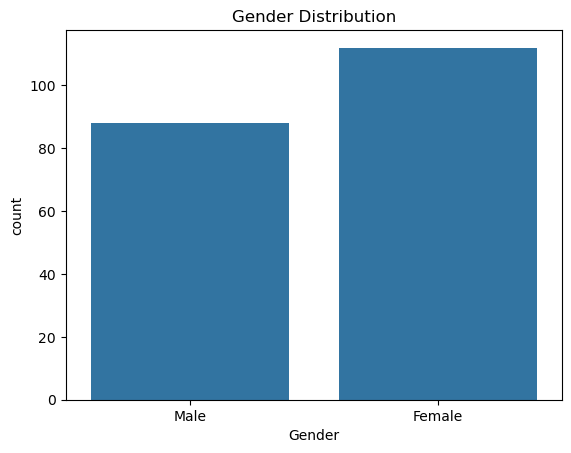

In [5]:
# Visualizing the distribution of Gender
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

The "Money Plot" (Income vs Spending)


Before modeling, visualize the relationship between Money and Spending.

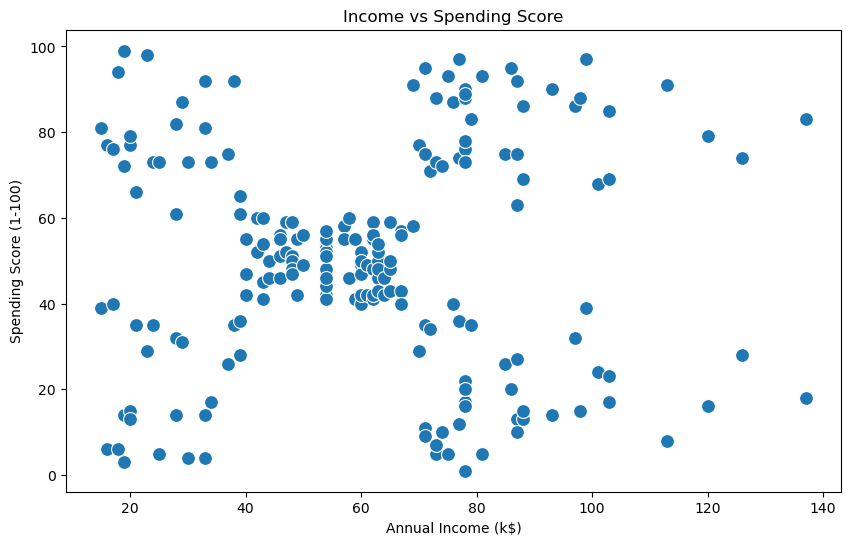

In [6]:
# Scatter plot: Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=100)
plt.title('Income vs Spending Score')
plt.show()

We will cluster based on Income and Spending Score only. It makes the visualization easiest.

In [7]:
# We only take the last two columns (Income and Score)
X = df.iloc[:, [2, 3]].values

Finding the "K" (Elbow Method)



We use the WCSS (Within-Cluster Sum of Square) score.

c:\Users\pawar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pawar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pawar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pawar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

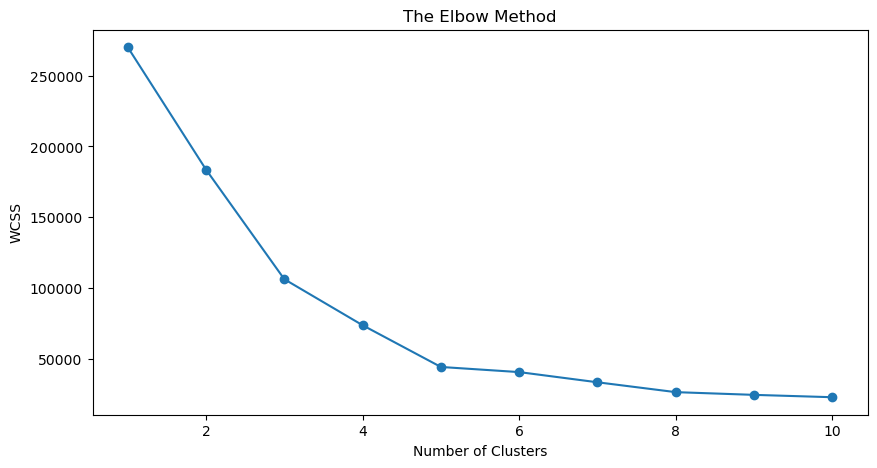

In [8]:
from sklearn.cluster import KMeans

wcss = []

# Try 1 to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The "bend" is at K=5.

In [9]:
# Train the model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Create a new column in the dataframe
df['Cluster'] = y_kmeans
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        4
1    Male   21                  15                      81        2
2  Female   20                  16                       6        4
3  Female   23                  16                      77        2
4  Female   31                  17                      40        4


c:\Users\pawar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


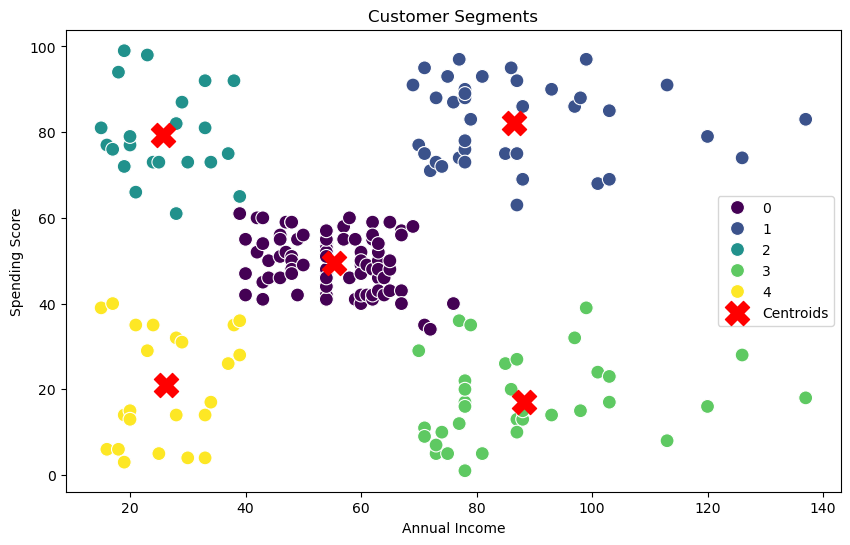

In [10]:
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)

# Plot the Centroids (Centers of the clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

🧾 The Business Insight (Crucial)
A data analyst doesn't just make blobs; they name them.

In your analysis, identify the groups based on the chart:

Low Income, Low Spend: "Sensible Savers" (Don't target).

Low Income, High Spend: "Careless Spenders" (Risk of debt, but good for low-cost promos).

High Income, Low Spend: "Misers / Savers" (Hard to convert).

High Income, High Spend: "Target Group / VIPs" (The Gold Mine! Target them with luxury ads).

Mid Income, Mid Spend: "Standard Customers".